## Extreme Gradient Boosting Tutorial - Using XGBRegressor

Peter R., 2023-08-01

### Intro
There are several way to carry our Extreme Gradient Boosting. You could use R or Python.  There are several R packages to do so such as "dismo" and "xgboosting". In Python there are several ways as well. You can do XGB with the sklearn framework and within this framework you can use "xgboost"  train(), XGBClassifier(), XGBRegression() etc.  Here I use XGBRegression().

Here I try XGBRegressor following Jason Brownlee's tutorial (see reference at the end).

#### File and folder path settings

In [1]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

print(cwd)

C:\Users\Peter R\github\forc_trends\models\xgboost


#### Load and explore the data

In [3]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot as plt
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [5]:
# You can subset data frame if needed
X1 = dataframe.iloc[:,0:8]
print(X1.head())


         0     1     2  3      4      5     6       7
0  0.00632  18.0  2.31  0  0.538  6.575  65.2  4.0900
1  0.02731   0.0  7.07  0  0.469  6.421  78.9  4.9671
2  0.02729   0.0  7.07  0  0.469  7.185  61.1  4.9671
3  0.03237   0.0  2.18  0  0.458  6.998  45.8  6.0622
4  0.06905   0.0  2.18  0  0.458  7.147  54.2  6.0622


In [12]:
# To run the mode, a data set with only values (no header) is needed.  Basically, this is an array.
data = dataframe.values # extract only values to run the model
print(data[:3, :5])

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01]
 [2.731e-02 0.000e+00 7.070e+00 0.000e+00 4.690e-01]
 [2.729e-02 0.000e+00 7.070e+00 0.000e+00 4.690e-01]]


#### Set up & run model

Here the model evaluation metric is mean absoulte error. Other metrics are available for regression.

In [13]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
#data = dataframe.values

# split data into input and output columns
X, y = data[:, :-1], data[:, -1]

# define model
model = XGBRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
# -1 means using all processors in parallel
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.113 (0.317)


In [27]:
# evaluate model with mean square error
scores2 = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores2 = absolute(scores)
print('Mean MSE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

Mean MSE: 2.113 (0.317)


In [26]:
import statistics

# evaluate model with variance explained
scores3 = cross_val_score(model, X, y, scoring='explained_variance', cv=cv, n_jobs=-1)
#print(scores3)

# force scores to be positive
#print(statistics.mean(scores3))
print('Mean Var. Explained: %.3f (%.3f)' % (scores3.mean(), scores3.std()) )

Mean Var. Explained: 0.881 (0.053)


#### Fine tunning parameters
Fine tune parameters to find a better model (potentially). Note: This currently does not work becasue of the llow number of fire and insect drivers in my test data

In [6]:
# Fine tune parameters using GridSearchCV. This won't work becasue of the limitation of the data

# Model 3: GridSearch Model but this does not have the same properties as a XGBClassifier() output
#param_grid1 = {
#'max_depth' : [3,4,5],
#'learning_rate': [0.1, 0.01, 0.05],
#'gamma': [0, 0.25, 1.0],
#'reg_lambda': [0, 1.0, 10.0],
#}


# grid_search is my new model
# subsample is for running the model faster
#model_gs = GridSearchCV(
#    estimator=xgb.XGBClassifier(objective='multi:softmax', seed=seed, eval_metric='aucpr', subsample=0.9,  colsample_bytree=0.5) ,
#    param_grid=param_grid1,
#    scoring = 'roc_auc',
#    n_jobs = 10,
#    cv = 3, #Can't be bigger than the number of records per group. These seem to be the folds
#    verbose=True
#)

#model_gs.fit(x2_train, y2_train)



#### Predictions
Now let's see how well the models can predict when given new data.

In [14]:
# fit a final xgboost model on the housing dataset and make a prediction
from numpy import asarray

# define model
model = XGBRegressor()

# fit model
model.fit(X, y)

# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_data = asarray([row])

# make a prediction
yhat = model.predict(new_data)

# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 24.019


#### Model accuracy
Let's measure the accuracy of the models. This does not apply when run regression only when doing classification.

You cannot calculate accuracy for regression algorithms. There are no classes. You must calculate an error like mean squared error. (Jason B.)

In [15]:
# Accuracy score. T
#from sklearn.metrics import accuracy_score #0.9142857142857143

#print('model_m2:', accuracy_score(y2_test, predictions2))


#### Model plots

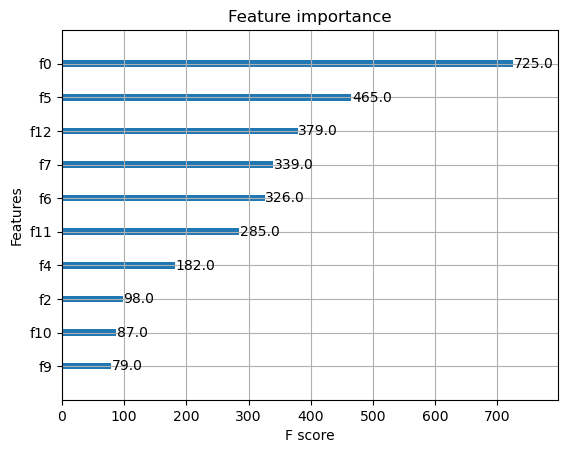

In [19]:
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10)
plt.show()


In [18]:
# save in JSON format
#model.save_model("model_regression1.json")
# save in text format
#model_m2.save_model("model_m2.txt")


In [ ]:
# load saved model
#model2 = xgb.Regressor()
#model2.load_model("model_regression1.json")


#### References

See tutorials:

https://www.youtube.com/watch?v=OQKQHNCVf5k

https://www.youtube.com/watch?v=GrJP9FLV3FE&t=2167s

https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

https://mljar.com/blog/xgboost-save-load-python/

https://machinelearningmastery.com/xgboost-for-regression/

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
